In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv(r'C:\Users\dell\Desktop\kc_house_data\kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [83]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [84]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### 1. *Basic Price Analysis*: What is the average, minimum, and maximum price of the houses?

In [85]:
average_price = df['price'].mean()  
minimum_price = df['price'].min()  
maximum_price = df['price'].max()  

print(f"Average Price: ${average_price:,.2f}")  
print(f"Minimum Price: ${minimum_price:,.2f}")  
print(f"Maximum Price: ${maximum_price:,.2f}")

Average Price: $540,088.14
Minimum Price: $75,000.00
Maximum Price: $7,700,000.00


#### 2. *Bedrooms and Price*: What is the relationship between the number of bedrooms and the price of the house? Does having more bedrooms increase the price?


Correlation between number of bedrooms and price of houses: 0.31


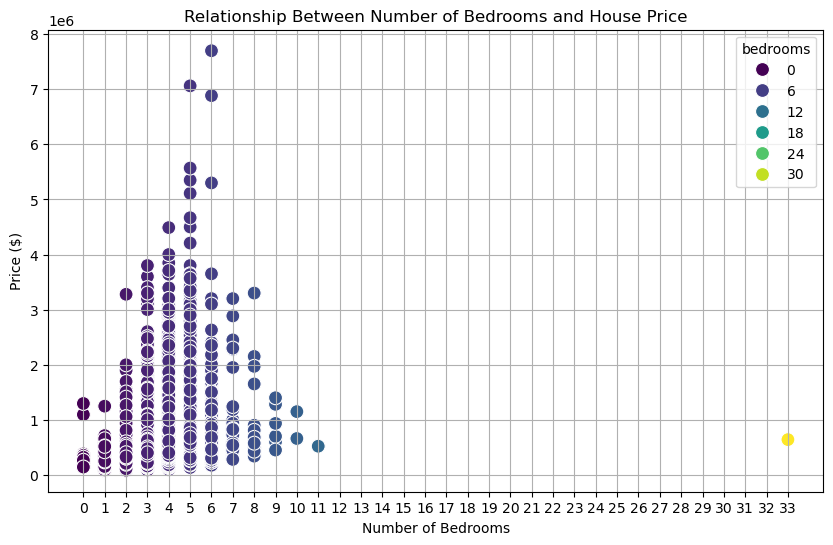

In [86]:
correlation = df['bedrooms'].corr(df['price'])  
 
print(f"Correlation between number of bedrooms and price of houses: {correlation:.2f}")  
  
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=df, x='bedrooms', y='price', hue='bedrooms', palette='viridis', s=100)  

plt.title('Relationship Between Number of Bedrooms and House Price')  
plt.xlabel('Number of Bedrooms')  
plt.ylabel('Price ($)')  
plt.xticks(range(df['bedrooms'].min(), df['bedrooms'].max() + 1))  # x-axis ticks  
plt.grid(True)  
  
plt.show()

#### 3. *Bathroom Count Analysis*: What is the distribution of the number of bathrooms? Which bathroom count is most common?


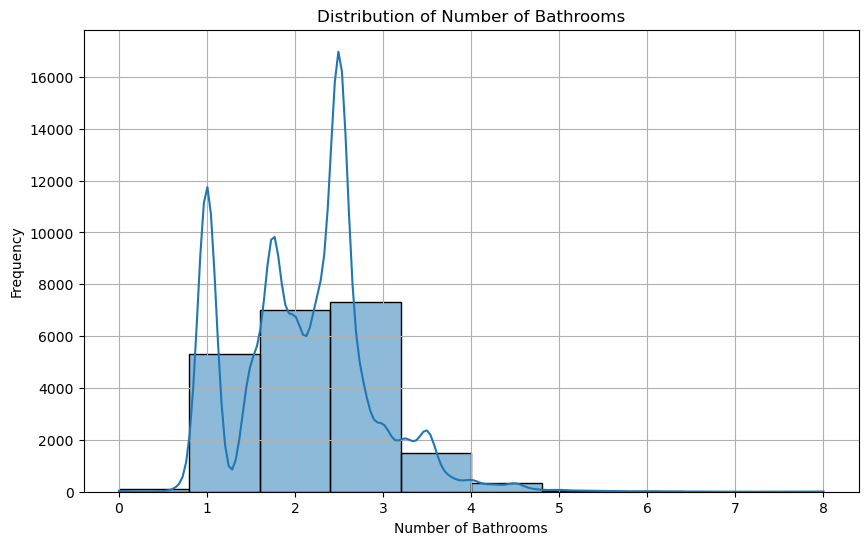

The most common bathroom count is: 2.5


In [87]:
plt.figure(figsize=(10, 6))  
sns.histplot(df['bathrooms'], bins=10, kde=True)  # kde=True adds a kernel density estimate  

plt.title('Distribution of Number of Bathrooms')  
plt.xlabel('Number of Bathrooms')  
plt.ylabel('Frequency')  
plt.grid(True)   
plt.show()  

most_common_bathrooms = df['bathrooms'].mode()[0]  
print(f"The most common bathroom count is: {most_common_bathrooms}")

#### 4. *Square Footage vs. Price*: Is there a correlation between the size of the living space (sqft_living) and the price of the house?

Correlation between square footage and price of houses: 0.70


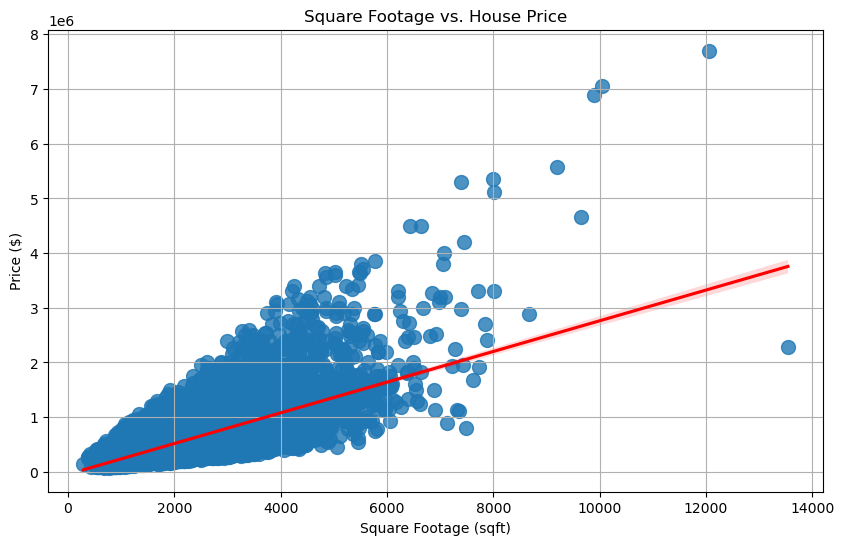

In [88]:
correlation = df['sqft_living'].corr(df['price'])  

print(f"Correlation between square footage and price of houses: {correlation:.2f}")  

plt.figure(figsize=(10, 6))  
sns.regplot(data=df, x='sqft_living', y='price', scatter_kws={'s': 100}, line_kws={'color': 'red'})  
 
plt.title('Square Footage vs. House Price')  
plt.xlabel('Square Footage (sqft)')  
plt.ylabel('Price ($)')  
plt.grid(True)    
plt.show()

#### 5. *Lot Size and Price*: How does the size of the lot (sqft_lot) relate to house prices? Is a larger lot size associated with higher prices?


Correlation between lot size and price of houses: 0.09


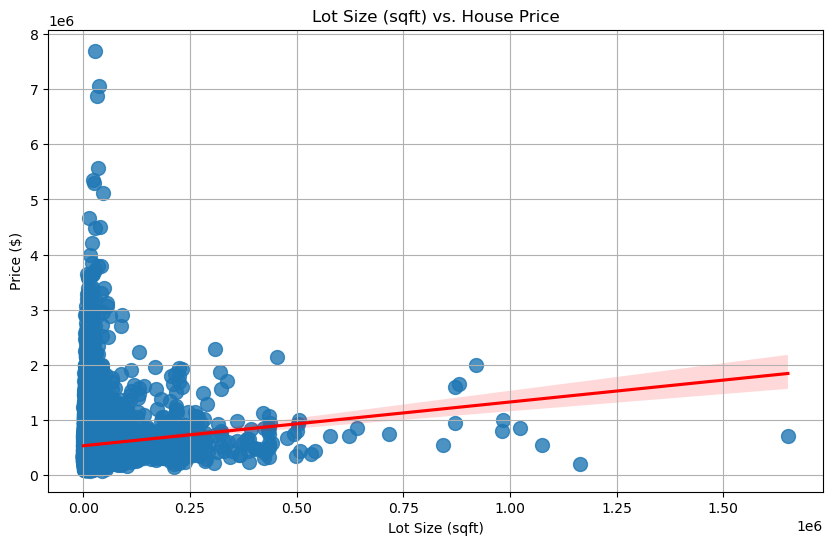

In [89]:
correlation = df['sqft_lot'].corr(df['price'])  
 
print(f"Correlation between lot size and price of houses: {correlation:.2f}")  
 
plt.figure(figsize=(10, 6))  
sns.regplot(data=df, x='sqft_lot', y='price', scatter_kws={'s': 100}, line_kws={'color': 'red'})  
 
plt.title('Lot Size (sqft) vs. House Price')  
plt.xlabel('Lot Size (sqft)')  
plt.ylabel('Price ($)')  
plt.grid(True)    
plt.show()

#### 6. *Floors and Price*: Does the number of floors in a house impact its price?

Mean Price by Number of Floors:
   floors         price
0     1.0  4.421806e+05
1     1.5  5.589806e+05
2     2.0  6.488912e+05
3     2.5  1.060346e+06
4     3.0  5.825260e+05
5     3.5  9.333125e+05


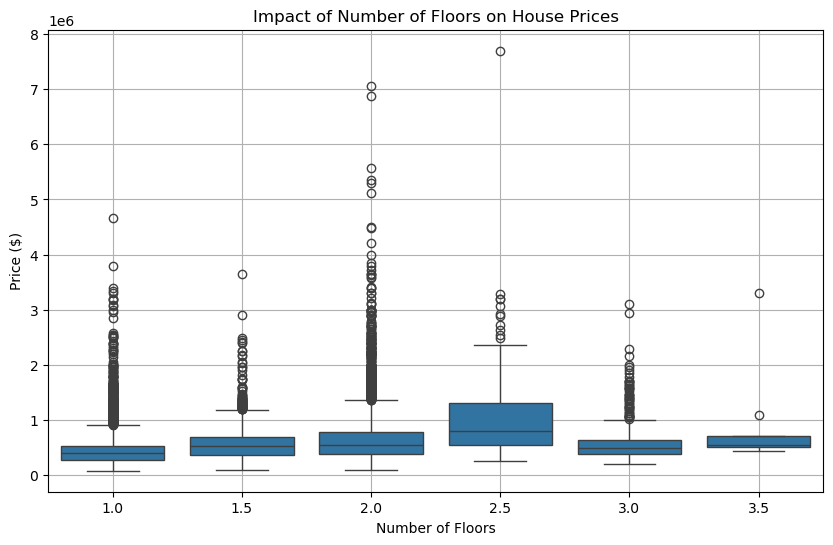

In [90]:
mean_price_by_floors = df.groupby('floors')['price'].mean().reset_index()  
 
print("Mean Price by Number of Floors:")  
print(mean_price_by_floors)  
  
plt.figure(figsize=(10, 6))  
sns.boxplot(data=df, x='floors', y='price')  
  
plt.title('Impact of Number of Floors on House Prices')  
plt.xlabel('Number of Floors')  
plt.ylabel('Price ($)')  
plt.grid(True)    
plt.show()

#### 7. *Waterfront Properties*: What percentage of the properties have waterfront views, and how do these properties compare in price to non-waterfront properties?

Percentage of properties with waterfront views: 0.75%
Mean price of waterfront properties: $1661876.02
Mean price of non-waterfront properties: $531563.60


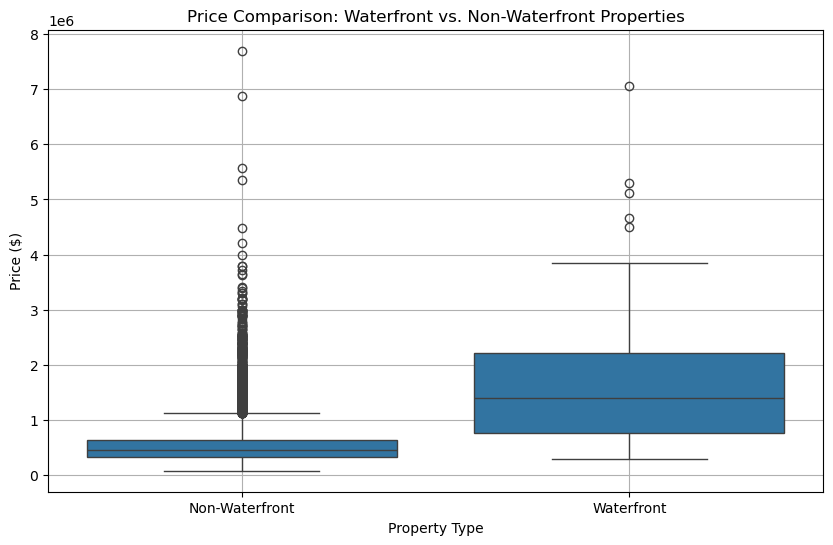

In [91]:
total_properties = len(df)  
waterfront_properties = df['waterfront'].sum()  
percentage_waterfront = (waterfront_properties / total_properties) * 100  
 
print(f"Percentage of properties with waterfront views: {percentage_waterfront:.2f}%")  
 
mean_price_waterfront = df[df['waterfront'] == 1]['price'].mean()  
mean_price_non_waterfront = df[df['waterfront'] == 0]['price'].mean()  
 
print(f"Mean price of waterfront properties: ${mean_price_waterfront:.2f}")  
print(f"Mean price of non-waterfront properties: ${mean_price_non_waterfront:.2f}")  
 
plt.figure(figsize=(10, 6))  
sns.boxplot(data=df, x='waterfront', y='price')  
plt.xticks([0, 1], ['Non-Waterfront', 'Waterfront'])    
plt.title('Price Comparison: Waterfront vs. Non-Waterfront Properties')  
plt.xlabel('Property Type')  
plt.ylabel('Price ($)')  
plt.grid(True)   
plt.show()

#### 8. *Grade vs. Price*: How do houses with different grades (overall quality of construction and design) differ in price?


Mean Price by Grade:
    grade         price
0       1  1.420000e+05
1       3  2.056667e+05
2       4  2.143810e+05
3       5  2.485240e+05
4       6  3.019196e+05
5       7  4.025903e+05
6       8  5.428528e+05
7       9  7.735132e+05
8      10  1.071771e+06
9      11  1.496842e+06
10     12  2.191222e+06
11     13  3.709615e+06


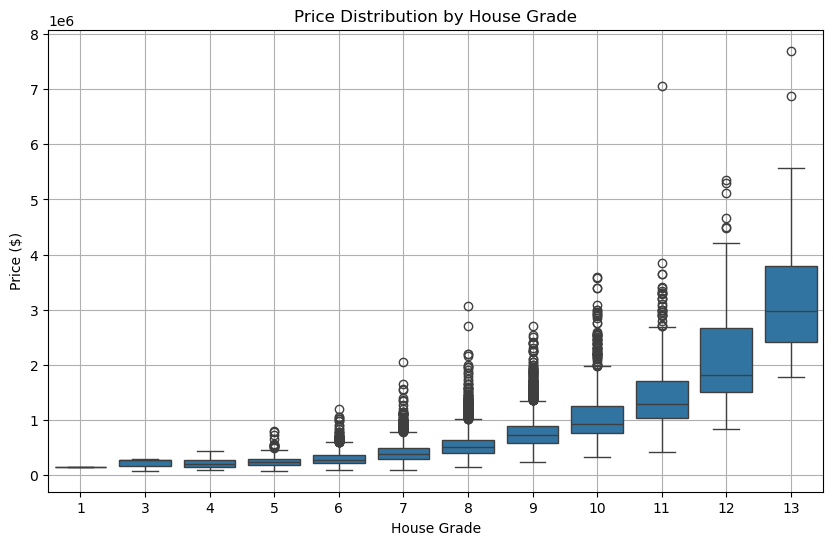

In [92]:
mean_price_by_grade = df.groupby('grade')['price'].mean().reset_index()  
 
print("Mean Price by Grade:")  
print(mean_price_by_grade)  
  
plt.figure(figsize=(10, 6))  
sns.boxplot(data=df, x='grade', y='price')   
plt.title('Price Distribution by House Grade')  
plt.xlabel('House Grade')  
plt.ylabel('Price ($)')  
plt.grid(True)    
plt.show()

#### 9. *Renovation Impact*: Does the year of renovation (yr_renovated) affect the price of the house? Are recently renovated houses more expensive?

Mean price of recently renovated houses: $760379.03
Mean price of non-renovated houses: $530360.82


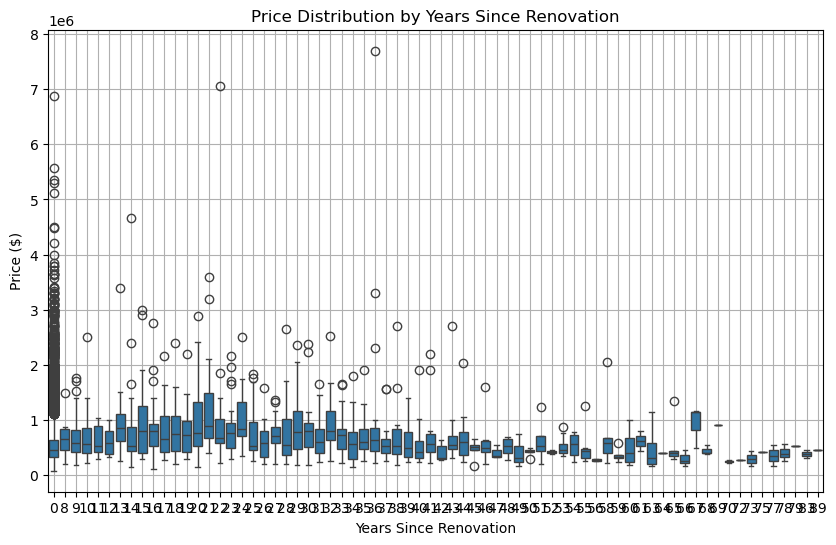

In [93]:
current_year = 2023  
 
df['years_since_renovated'] = np.where(df['yr_renovated'] == 0, 0, current_year - df['yr_renovated'])  
 
renovated_houses = df[df['yr_renovated'] > 0]  
non_renovated_houses = df[df['yr_renovated'] == 0]  
 
mean_price_renovated = renovated_houses['price'].mean()  
mean_price_non_renovated = non_renovated_houses['price'].mean()  

print(f"Mean price of recently renovated houses: ${mean_price_renovated:.2f}")  
print(f"Mean price of non-renovated houses: ${mean_price_non_renovated:.2f}")  
 
plt.figure(figsize=(10, 6))  
sns.boxplot(data=df, x='years_since_renovated', y='price')   
plt.title('Price Distribution by Years Since Renovation')  
plt.xlabel('Years Since Renovation')  
plt.ylabel('Price ($)')  
plt.grid(True)    
plt.show()

#### 10. *Zip Code Price Comparison*: What are the average house prices for different zip codes? Which zip code has the highest and lowest average prices?

In [100]:
import pandas as pd  
  
average_price_by_zip = df.groupby('zip_code')['price'].mean().reset_index()  

 
average_price_by_zip.sort_values(by='price', ascending=False, inplace=True)  


print("Average House Prices by Zip Code:")  
print(average_price_by_zip)  

  
highest_avg_price = average_price_by_zip.iloc[0]  
lowest_avg_price = average_price_by_zip.iloc[-1]  

print(f"\nZip Code with Highest Average Price: {highest_avg_price['zip_code']} - Average Price: ${highest_avg_price['price']:.2f}")  
print(f"Zip Code with Lowest Average Price: {lowest_avg_price['zip_code']} - Average Price: ${lowest_avg_price['price']:.2f}")

Average House Prices by Zip Code:
   zip_code     price
2     98003  604000.0
3     98004  510000.0
1     98002  444000.0
0     98001  200950.0

Zip Code with Highest Average Price: 98003.0 - Average Price: $604000.00
Zip Code with Lowest Average Price: 98001.0 - Average Price: $200950.00


#### 11. *Condition and Price*: How does the condition of the house (as recorded in the condition column) affect its price?

Average house prices by condition:
   condition          price
0          1  334431.666667
1          2  327287.145349
2          3  542012.578148
3          4  521200.390033
4          5  612418.089359


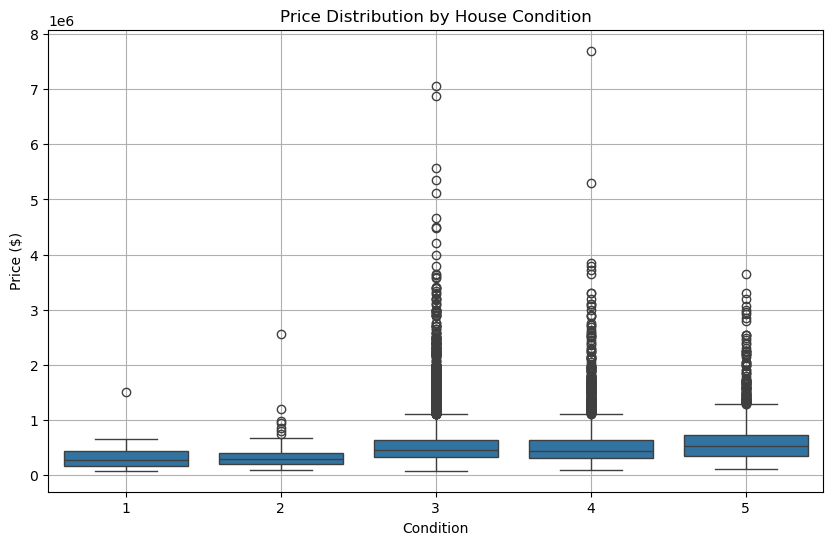

In [57]:
  
average_price_by_condition = df.groupby('condition')['price'].mean().reset_index()  
 
print("Average house prices by condition:")  
print(average_price_by_condition)  
 
plt.figure(figsize=(10, 6))  
sns.boxplot(data=df, x='condition', y='price')  
 
plt.title('Price Distribution by House Condition')  
plt.xlabel('Condition')  
plt.ylabel('Price ($)')  
plt.grid(True)    
plt.show()

#### 12. *Age of the House*: How does the year the house was built (yr_built) impact the price? Are newer houses priced higher than older ones?

Average house prices by year built:
     yr_built          price
0        1900  581387.206897
1        1901  556935.931034
2        1902  673007.407407
3        1903  480958.195652
4        1904  583756.644444
..        ...            ...
111      2011  544522.000000
112      2012  527447.335294
113      2013  678545.452736
114      2014  683681.754919
115      2015  759785.157895

[116 rows x 2 columns]


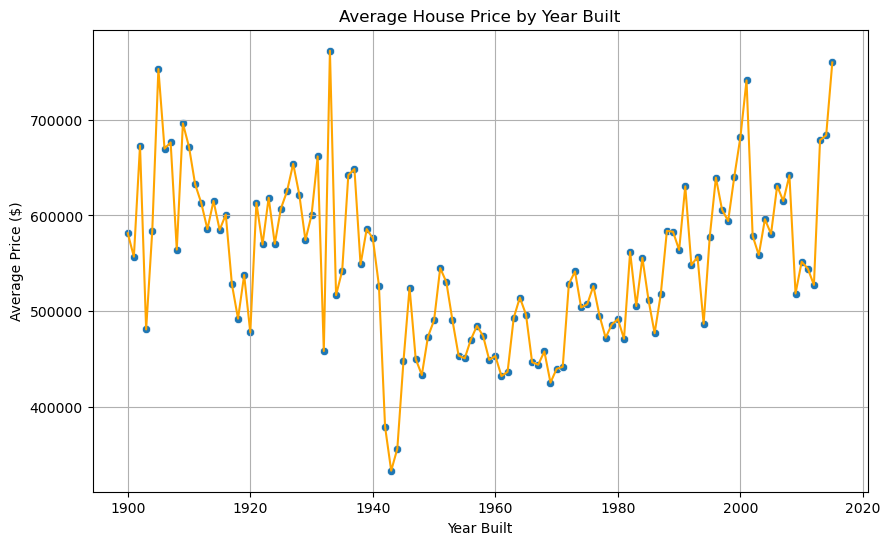


Mean price of newer houses (built >= 2000): $618359.97
Mean price of older houses (built < 2000): $517986.82


In [60]:
 
average_price_by_year = df.groupby('yr_built')['price'].mean().reset_index()  
 
print("Average house prices by year built:")  
print(average_price_by_year)  

plt.figure(figsize=(10, 6))  
sns.scatterplot(data=average_price_by_year, x='yr_built', y='price', marker='o')  

sns.lineplot(data=average_price_by_year, x='yr_built', y='price', color='orange')  

plt.title('Average House Price by Year Built')  
plt.xlabel('Year Built')  
plt.ylabel('Average Price ($)')  
plt.grid(True)  
plt.show()  

newer_houses = df[df['yr_built'] >= 2000]  # Example threshold for newer houses  
older_houses = df[df['yr_built'] < 2000]   # Older houses  

mean_price_newer = newer_houses['price'].mean()  
mean_price_older = older_houses['price'].mean()  

print(f"\nMean price of newer houses (built >= 2000): ${mean_price_newer:.2f}")  
print(f"Mean price of older houses (built < 2000): ${mean_price_older:.2f}")

#### 13. *Basement and Price*: Is there a significant price difference between houses with basements (sqft_basement) and those without?

Average house prices by basement presence:
       has_basement     price
0     With Basement  445300.0
1  Without Basement  356000.0


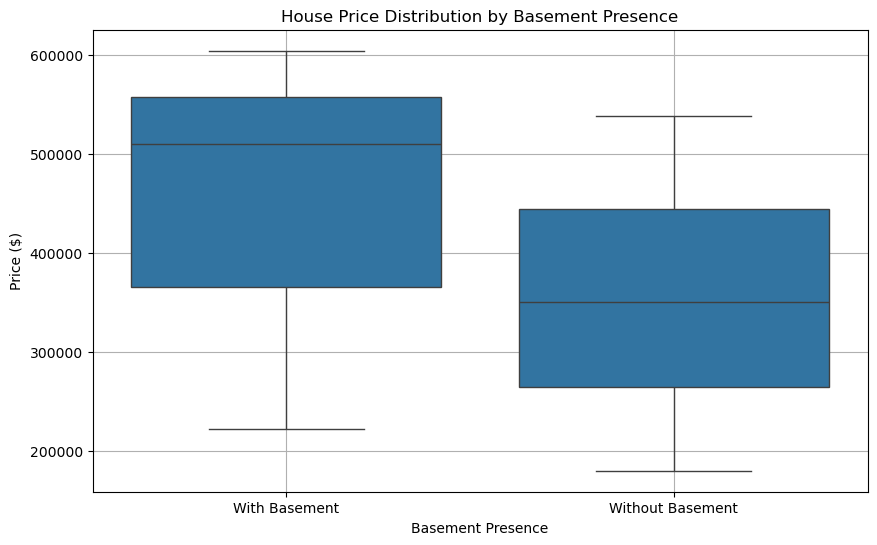

T-Test Results: t-statistic = 0.58, p-value = 0.59449


In [63]:
  
from scipy import stats  
 
df['has_basement'] = df['sqft_basement'].apply(lambda x: 'With Basement' if x > 0 else 'Without Basement')  
  
average_price_by_basement = df.groupby('has_basement')['price'].mean().reset_index()  
print("Average house prices by basement presence:")  
print(average_price_by_basement)  
  
plt.figure(figsize=(10, 6))  
sns.boxplot(data=df, x='has_basement', y='price')  

plt.title('House Price Distribution by Basement Presence')  
plt.xlabel('Basement Presence')  
plt.ylabel('Price ($)')  
plt.grid(True)  
plt.show()  
 
with_basement = df[df['has_basement'] == 'With Basement']['price']  
without_basement = df[df['has_basement'] == 'Without Basement']['price']  
t_stat, p_value = stats.ttest_ind(with_basement, without_basement)  

print(f'T-Test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.5f}')

#### 14. *Living Space Change*: Analyze how living space in 2015 (sqft_living15) compares to previous years (sqft_living) and how this change impacts the price.

C:\Users\dell\AppData\Local\Temp\ipykernel_11360\180060042.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_change = df.groupby(pd.cut(df['change_in_living_space'], bins=10))['price'].mean().reset_index()


Average house prices by change in living space:
  change_in_living_space         price
0     (-8701.0, -7590.0]  4.990000e+06
1     (-7590.0, -6490.0]           NaN
2     (-6490.0, -5390.0]  4.884848e+06
3     (-5390.0, -4290.0]  2.687618e+06
4     (-4290.0, -3190.0]  2.183900e+06
5     (-3190.0, -2090.0]  1.389042e+06
6      (-2090.0, -990.0]  9.157030e+05
7        (-990.0, 110.0]  5.257121e+05
8        (110.0, 1210.0]  4.601530e+05
9       (1210.0, 2310.0]  6.009151e+05


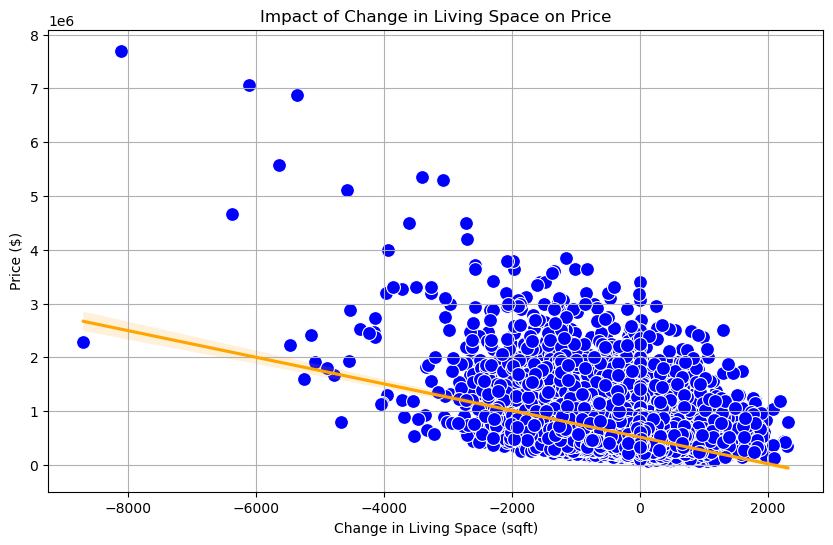


Correlation between change in living space and price: -0.41
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     4250.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:04:26   Log-Likelihood:            -3.0566e+05
No. Observations:               21613   AIC:                         6.113e+05
Df Residuals:                   21611   BIC:                         6.113e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [79]:
  
from scipy import stats  
 
df['change_in_living_space'] = df['sqft_living15'] - df['sqft_living']  
 
average_price_by_change = df.groupby(pd.cut(df['change_in_living_space'], bins=10))['price'].mean().reset_index()  
 
print("Average house prices by change in living space:")  
print(average_price_by_change)  

plt.figure(figsize=(10, 6))  
sns.scatterplot(data=df, x='change_in_living_space', y='price', color='blue', s=100)   
sns.regplot(data=df, x='change_in_living_space', y='price', scatter=False, color='orange')  
plt.title('Impact of Change in Living Space on Price')  
plt.xlabel('Change in Living Space (sqft)')  
plt.ylabel('Price ($)')  
plt.grid(True)   
plt.show()  

correlation = df[['change_in_living_space', 'price']].corr().iloc[0, 1]  
print(f'\nCorrelation between change in living space and price: {correlation:.2f}')  

  
import statsmodels.api as sm  

X = df['change_in_living_space']  
y = df['price']  
X = sm.add_constant(X)    
model = sm.OLS(y, X).fit()   
print(model.summary())

#### 15. *Geographical Location and Price*: Use latitude (lat) and longitude (long) to explore how house prices vary across different locations. Are certain locations more expensive?

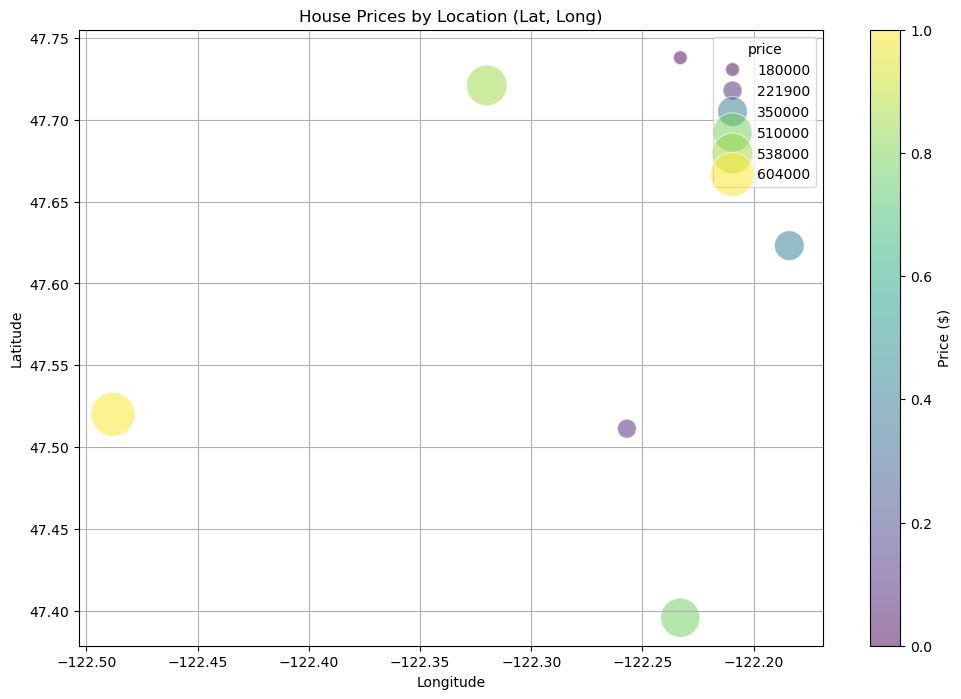

C:\Users\dell\AppData\Local\Temp\ipykernel_11360\466053143.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(values='price', index=pd.cut(df['lat'], bins=10), columns=pd.cut(df['long'], bins=10), aggfunc=np.mean)
C:\Users\dell\AppData\Local\Temp\ipykernel_11360\466053143.py:10: FutureWarning: The provided callable <function mean at 0x000002355F38CEA0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = df.pivot_table(values='price', index=pd.cut(df['lat'], bins=10), columns=pd.cut(df['long'], bins=10), aggfunc=np.mean)


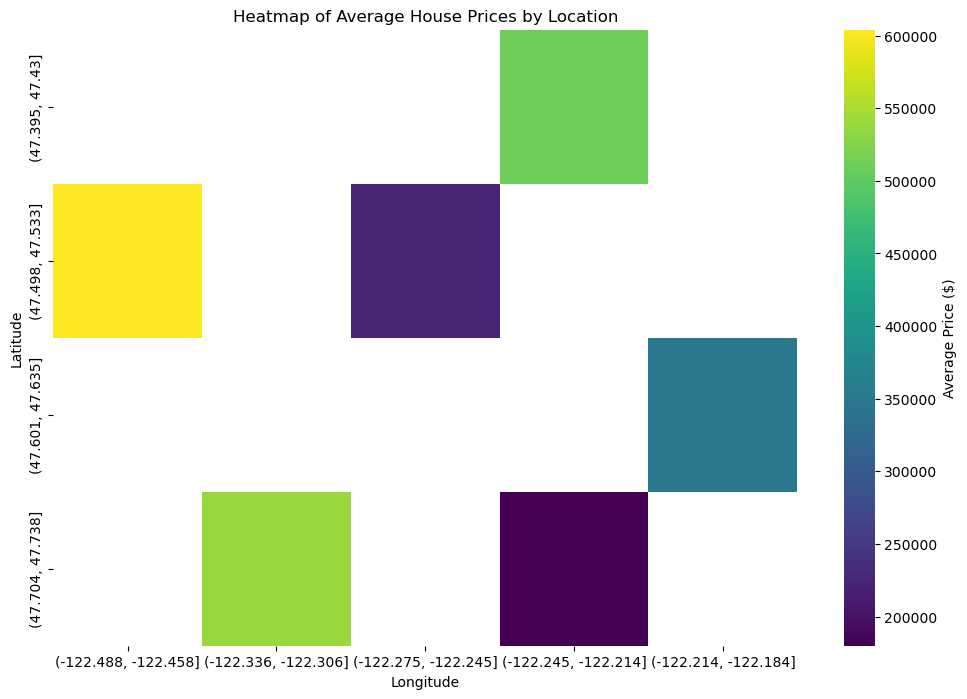

In [103]:
   
 
plt.figure(figsize=(12, 8))  
scatter = sns.scatterplot(data=df, x='long', y='lat', size='price', sizes=(100, 1000), alpha=0.5, hue='price', palette='viridis')  
plt.title('House Prices by Location (Lat, Long)')  
plt.xlabel('Longitude')  
plt.ylabel('Latitude')  
plt.colorbar(scatter.collections[0], label='Price ($)')  
plt.grid(True)  
plt.show()  
 
heatmap_data = df.pivot_table(values='price', index=pd.cut(df['lat'], bins=10), columns=pd.cut(df['long'], bins=10), aggfunc=np.mean)  
plt.figure(figsize=(12, 8))  
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Average Price ($)' })  
plt.title('Heatmap of Average House Prices by Location')  
plt.xlabel('Longitude')  
plt.ylabel('Latitude')  
plt.show()